# 데이터프레임의 결합

데이터를 이용하여 분석을 하는 경우 사용할 자료가 두 개 이상이 경우는 매우 흔한 일이다. 실제로 데이터 분석에서 하나의 자료만 가지고 수행하는 일은 매우 드물다.

여러 개의 자료를 사용하는 경우 두 개의 자료를 서로 결합하여 새로운 자료를 만들어야 하는 경우가 많다.

이 절에서는 먼저 데이터프레임을 결합하는 다양한 예제를 살펴보고, 가구 자료와 인구 자료를 결합하여 가구당 평균 인원수를 계산해 볼 것이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 간단한 결합

두 개의 데이터프레임 `df1` 과 `df2` 가 다음과 같이 주어졌다고 하자.

In [2]:
df1 = pd.DataFrame({
    "name" : ["철수", "John", "영이"],
    "age"  : [23, 34, 19]
})
df1

,name,age
0,철수,23
1,John,34
2,영이,19


In [ ]:
df2 = pd.DataFrame({
    "name" : ["철수", "영이", "John"],
    "sex"  : ["M", "F", "M"]
})
df2

,name,sex
0,철수,M
1,영이,F
2,John,M


데이터프레임 `df1` 과 `df2` 에는 같은 이름을 가지는 열 `name` 이 있다. 우리는 두 개의 데이터프레임을 합쳐서 나이(`age`)와 성(`sex`) 이 모두 포함된 새로운 데이터프레임을 만들려고 한다.

이렇게 공통으로 포함된 열의 정보를 이용하여 두 개의 데이터프레임을 결합하려면  pandas 라이브러리의 `merge()` 함수 를 이용한다.

- `merge()` 함수의 첫 번째(**왼쪽**)와 두 번째 인자(**오른쪽**)에는 결합할 데이터프레임의 이름을 넣어준다.

- 앞에 `pd.` 를 붙여서 `pd.merge()` 로 사용하는 것은 함수 `merge()` 가 pandas 라이브러리에 있다는 것을 알려준다.

-  선택문 `on=` 에 두 데이터프레임에 **결합의 기준이 되는 열이름**을 문자열로 지정해준다. 결합의 기준으로 사용되는 열이름은 두 개의 데이터프레임에 모두 존재해야 한다.

- 자료의 결합에 사용되는 공통으로 포함된 열의 내용을 **식별자(key, identifier,..)** 라고 부른다. 이 예제에서 식별자는 사람의 이름이다.   

다음 코드의 결과를 먼저 보자.

In [ ]:
pd.merge(df1, df2, on="name")

,name,age,sex
0,철수,23,M
1,영이,34,F
2,John,19,M


두 개의 데이터프레임이 지정된 열 `name` 에 의하여 결합되어 나이(`age`)와 성(`sex`)이 같이 나타나게 된다.

## 식별자의 불일치

만약 두 개의 데이터프레임에 있는 식별자에 포함된 자료가 다르면 어떻게 될까?

다음과 같이 `john` 의 자료가 빠져 있는 데이터프레임 `df3`을  `df1` 과 결합해 보자.

In [ ]:
df3 = pd.DataFrame({
    "name" : ["철수", "영이"],
    "weight"  : [55, 44]
})
df3

,name,weight
0,철수,55
1,영이,44


In [ ]:
pd.merge(df1, df3, on="name")

#쌍 없으면 삭제 시킴

,name,age,weight
0,철수,23,55
1,영이,34,44


위의 결과에서 `John` 의 자료가 사라져 버렸다. 물론 몸무게 값이 없는 `John` 의 자료가 필요없을 수도 있지만 많은 경우 자료를 유지해야 한다.

이렇게 식별자의 항목이 다른 경우, 결합의 기준이 되는 식별자를 데이터프레임의 위치로 지정할 수 있다. 위에서 함수 `merge()`를 설명할 때 사용되는 데이터프레임의 위치에 따라서 **왼쪽** (첫 번째 인자) 과  **오른쪽** (두 번째 인자)으로 나타냈다.

```
pd.merge(left, right, ....)
```

이제 결합시 기준이 되는 식별자가 왼쪽에 있는 데이터프레임 `df1` 에 있다는 것을 선택명령문 `how='left'` 로 알려주자.

In [ ]:
pd.merge(df1, df3, on="name", how='left')
#왼쪽이 df1

,name,age,weight
0,철수,23,55.0
1,영이,34,44.0
2,John,19,NaN


 이제 `John` 의 자료가 나타나고 `John` 의 키는 결측값(`NaN`) 으로 표시된다.

만약 두 개의 식별자에 서로 다른 내용이 나타나면 어떻게 될까?

이제 새로운 사람 `흥민`의 자료를 가진 데이터프레임 `df4`를 `df1` 과 결합하는 예를 살펴보자. 아래 코드에서 선택명령문 `how=` 에 지정된 문자열에 따라서 결합의 결과가 어떻게 다른지 보자.

In [ ]:
df4 = pd.DataFrame({
    "name" : ["철수", "영이", "흥민"],
    "height"  : [167, 175, 183]
})
df4

,name,height
0,철수,167
1,영이,175
2,흥민,183


In [ ]:
pd.merge(df1, df4, on="name", how='left')  # 식별자는 왼쪽 데이터프레임에만 있는 것으로

,name,age,height
0,철수,23,167.0
1,영이,34,175.0
2,John,19,NaN


In [ ]:
pd.merge(df1, df4, on="name", how='right') # 식별자는 오른쪽 데이터프레임만 있는 것으로

,name,age,height
0,철수,23.0,167
1,영이,34.0,175
2,흥민,NaN,183


In [ ]:
pd.merge(df1, df4, on="name", how='inner') # 식별자는 두 데이터프레임에 공통인 것

,name,age,height
0,철수,23,167
1,영이,34,175


In [ ]:
pd.merge(df1, df4, on="name", how='outer')  # 식별자는 두 데이터프레임의 모든 것

,name,age,height
0,철수,23.0,167.0
1,영이,34.0,175.0
2,John,19.0,NaN
3,흥민,NaN,183.0


## 요약

두 개의 데이터프라임을 결합하는 경우 pandas 라이브러리의 함수 `merge()` 를 사용하며 식별자가 포함된 공통의 열은 `on=` 으로 지정한다.

```
pd.merge(left_df, right_df, on="name", how="inner")
```

이제 두 개의 데이터 프레임을 결합할 때 식별자를 선택하는 방법을 요약해 보자.

- `how='left'` : 식별자는 왼쪽 데이터프레임에만 있는 것으로 선택
- `how='right'` : 식별자는 오른쪽 데이터프레임에만 있는 것으로 선택
- `how='inner'` : 식별자는 두 데이터프레임에 공통인 것으로 선택
- `how='outer'` : 식별자는 두 데이터프레임에 나타난 모든 것으로 선택


식별자를 선택하는 선택명령문 `how=` 을 지정하지 않으면 디폴트는 방법은 `how='inner` 이다.

## 가구당 평균 인원수

앞 절에서 우리나라의 1인 가구수의 비율이 연도별로 어떻게 변화헸는지 알아보있다.

이제 연도별로 가구당 평균 인원수가 어떻게 변화되었는지 알아보자. 가구당 평균 인원수를 알기 위해서는 우리나라의 전체 가구수뿐 만아니라 전체 인구수도 알아야 한다.

$$ \text{가구당 평균 인원수 }= \frac{\text{전체 인구수}}{\text{전체 가구수}} $$


이제 가구 자료가 포함된 화일 `korea_house_data_01.csv`과 인구 자료가 포함된 화일 `korea_population_data_01.csv` 를 데이터프레임을 만들자. 다음으로 지금까지 배운 다양한 함수와 메소드를 이용하여 연도별 가구당 평균 인원수를 구하여 어떻게 변화했는지 알아보자.

이제 통계청에서 받은 원자료를 데이터프레임으로 만들어서 정리하는 일련의 작업을 한번에 적용해 본다. 이렇게 여러 단계의 작업을 프로그램으로 만들어 놓으면 자료의 갱신이나 수정을 손쉽게 할 수 있다.   

### 가구 자료의 정리

먼저 앞 절에서 다루었던 가구 자료를 먼저 정리하여 필요한 데이터프레임을 만들자.

In [ ]:
url1= "https://ilovedata.github.io/teaching/bigdata2/data/korea_house_data_01.csv"
house = pd.read_csv(url1, encoding="CP949")
house.head(5)

,시점,행정구역별(읍면동),일반가구_계,1인,2인,3인,4인,5인,6인,7인 이상
0,2015,전국,19111030,5203440,4993818,4100979,3588931,940413,217474,65975
1,2015,서울특별시,3784490,1115744,930467,817440,701945,169436,38547,10911
2,2015,부산광역시,1335900,361749,366048,296742,238031,56971,12928,3431
3,2015,대구광역시,928528,239517,239824,208795,184258,44071,9582,2481
4,2015,인천광역시,1045417,243678,265079,245135,220538,55230,12253,3504


이제 배운 다양한 메소드를 차례대로 적용하여 연도별 총가구수를 가진 데이터프레임 `house_final` 을 만들어 보자.

먼저 열 `"일반가구_계` 과 행 `전국` 을 제외하고 열이름을 바꾼다. 모두 `inplace= True`을 사용하여 데이터프레임 `house` 가 변경된다.

In [ ]:
house.drop(columns = ["일반가구_계"], inplace= True)

In [ ]:
index_for_delete = house[house["행정구역별(읍면동)"] == '전국'].index

In [ ]:
house.drop( index = index_for_delete, inplace= True )

In [ ]:
house.rename( columns={
	"시점" : "year", "행정구역별(읍면동)" : "region",
	"1인" : "p1", "2인" : "p2", "3인" : "p3", "4인" : "p4",
	"5인" : "p5", "6인" : "p6", "7인 이상" : "p7plus"},
	inplace=True)

In [ ]:
house.head(5)

,year,region,p1,p2,p3,p4,p5,p6,p7plus
1,2015,서울특별시,1115744,930467,817440,701945,169436,38547,10911
2,2015,부산광역시,361749,366048,296742,238031,56971,12928,3431
3,2015,대구광역시,239517,239824,208795,184258,44071,9582,2481
4,2015,인천광역시,243678,265079,245135,220538,55230,12253,3504
5,2015,광주광역시,163577,137662,115701,109612,32199,6647,1759


이제 년도별로 그룹을 만들어 시도 가구수를 모두 합치고 전국 가구수를 열 `house_total` 에 만들자.

In [ ]:
house_final =house.groupby( by=["year"] ).sum().reset_index()

In [ ]:
house_final['house_total'] = house_final[ [ "p1","p2","p3","p4","p5","p6","p7plus"] ].sum(axis=1)

In [ ]:
house_final

,year,p1,p2,p3,p4,p5,p6,p7plus,house_total
0,2015,5203440,4993818,4100979,3588931,940413,217474,65975,19111030
1,2016,5397615,5067166,4151701,3551410,924373,211475,63956,19367696
2,2017,5618677,5260332,4178641,3473897,886479,197517,58332,19673875
3,2018,5848594,5445691,4203792,3396320,849167,182886,52738,19979188
4,2019,6147516,5663330,4217736,3300114,801048,166866,46578,20343188
5,2020,6643354,5864525,4200629,3271315,761417,147172,38298,20926710


### 인구 자료의 정리

이제 인구 자료를 읽어서 정리하여 필요한 데이터프레임을 만들자.

In [ ]:
url2 = "https://ilovedata.github.io/teaching/bigdata2/data/korea_population_data_01.csv"
pop = pd.read_csv(url2, encoding="CP949")

In [ ]:
pop.head(5)

,시점,행정구역별(읍면동),남자(명),여자(명)
0,2015,서울특별시,4859535,5044777
1,2015,부산광역시,1701347,1747390
2,2015,대구광역시,1228511,1237541
3,2015,인천광역시,1455017,1435434
4,2015,광주광역시,748867,754014


열이름을 영문으로 바꾸고 연도별 총인구수를 가진 열 `pop_total` 를 만들어 보자.

In [ ]:
pop.rename( columns={
	"시점" : "year", "행정구역별(읍면동)" : "region",
	"남자(명)" : "male", "여자(명)" : "female"},
	inplace=True)

In [ ]:
pop_final = pop.groupby(by="year").sum().reset_index()

In [ ]:
pop_final["pop_total"] =  pop_final[["male", "female"]].sum(axis=1)

In [ ]:
pop_final

,year,male,female,pop_total
0,2015,25608502,25460873,51069375
1,2016,25696987,25572567,51269554
2,2017,25768055,25654452,51422507
3,2018,25877195,25752317,51629512
4,2019,25952070,25827133,51779203
5,2020,25915207,25913929,51829136


### 데이터 프레임의 결합

이제 두 개의 데이터프레임 `house_final` 과 `pop_final` 에서 년도(`year`)와  각각 총가구수(`house_total`), 총인구수(`pop_total`) 을 슬라이싱하여 년도로 결합해 보자

In [ ]:
all_final = pd.merge(house_final[['year', 'house_total']], pop_final[['year','pop_total']], on = 'year')

In [ ]:
all_final

,year,house_total,pop_total
0,2015,19111030,51069375
1,2016,19367696,51269554
2,2017,19673875,51422507
3,2018,19979188,51629512
4,2019,20343188,51779203
5,2020,20926710,51829136


### 결과

이제 마지막으로 가구당 평균 인원수를 구하여 열 `avg_person_per_house`에 저장하고 시가에 따른 변화를 그림으로 그려보자.

In [ ]:
all_final["avg_person_per_house"] = all_final["pop_total"] / all_final["house_total"]

In [ ]:
all_final

,year,house_total,pop_total,avg_person_per_house
0,2015,19111030,51069375,2.672246
1,2016,19367696,51269554,2.647168
2,2017,19673875,51422507,2.613746
3,2018,19979188,51629512,2.584165
4,2019,20343188,51779203,2.545285
5,2020,20926710,51829136,2.476698


<AxesSubplot:xlabel='year'>

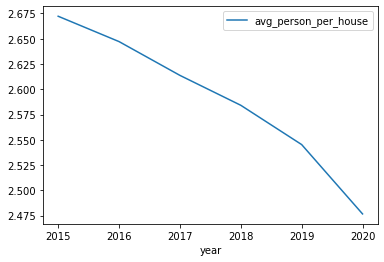

In [ ]:
all_final.plot.line(x='year', y='avg_person_per_house')

우리가 계산한 결과는 [국가지표체계](https://www.index.go.kr/unify/idx-info.do?idxCd=4229)에서 다시 확인할 수 있다.